### Lab 3: An Introduction to Using PyCO2SYS for Acid-Base Calculations

This brief tutorial is based on a ***Welcome to PyCO2SYS*** Jupyter Notebook by Matt Humphreys that can be found at https://github.com/mvdh7/PyCO2SYS 

Even if you are very new to Python, you should still be able to follow what's going on here and understand how to make some changes to the code and generate some useful plots - but this is not intended as a Python tutorial.

We will work through a series of examples of PyCO2SYS calculations, starting with the most basic and gradually building up the complexity.

> **How does this work?**
> 
> This is a [Jupyter notebook](https://realpython.com/jupyter-notebook-introduction/).  Because we are running this notebook [through the UVic Syzygy site](https://uvic.syzygy.ca), then Python is running live in your web browser! You will not need to have an instance of Python installed and running on your computer to execute code in this document! Exciting...
>
> You can run the different sections of code below by clicking on them with your mouse.  The selected code section gets outlined by a box with a thick green or blue bar down the left-hand side.  Then either click the Run button at the top or press ctrl+enter on your keyboard to run the selected section.
>
> To the upper left of each code section you will see `In [ ]:`.  An asterisk (`*`) appears between the brackets while the code is running, which changes to a number once each section of code has successfully run.  Once it has been run (but not before!), the results calculated in one code section can be used in any other.  **For the exercises we will focus on today some sections rely on earlier ones having been run, so it is important to run them all in sequence!**
>
> You can edit the code freely and run it again to see what happens.  Don't worry, your changes are only local, so they won't affect anyone else.  If you close the notebook and start it up again it will all be reset (unless you've downloaded this and are running it on your own Jupyter server).

## Install and Import PyCO2SYS

Before we can use any package like PyCO2SYS in Python we must install it on first use and then import it.  This is very simple to do, using the following convention.  Not much appears to happen, but check that a number appears in the brackets at the top left (e.g. `In [1]:`):

In [1]:
!pip install PyCO2SYS
import PyCO2SYS as pyco2

  Using cached PyCO2SYS-1.8.2-py3-none-any.whl (107 kB)
  Obtaining dependency information for xarray>=0.15 from https://files.pythonhosted.org/packages/b5/36/1f4d4bc9be1957716ab93b8be8ea64df6b891ff3fc438f4964916fa6d714/xarray-2023.9.0-py3-none-any.whl.metadata
  Using cached xarray-2023.9.0-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for autograd>=1.4 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Using cached autograd-1.6.2-py3-none-any.whl.metadata (706 bytes)
  Using cached future-0.18.3-py3-none-any.whl
Using cached autograd-1.6.2-py3-none-any.whl (49 kB)
Using cached xarray-2023.9.0-py3-none-any.whl (1.0 MB)


## A Simple Example of What PyCO2SYS Can Do

Having installed and imported PyCO2SYS, we can define a recipe and solve the for the equilibirum concentrations of the dissolved phase for natural systems containing common weak acids.

PyCO2SYS is capable of taking a variety of inputs like *in situ* temperature, pressure and salinity as well as commonly measured parameters like pH, dissolved inorganic carbon concentration (*C<sub>T</sub>*) and Alkalinty (Alk) to calculate and output equilibrium concentrations of dissolved chemical species.


> For more information on the arguments and results below please consult the [online docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/).
>
> You can also find the [full citations](https://pyco2sys.readthedocs.io/en/latest/refs/) for the abbreviated references (e.g. `LDK00`) mentioned in the code.



## Example 1: The CO<sub>2</sub> Equivalence Point
Recall our example from class where we had a pure solution of CO<sub>2</sub> where we bubbled in the gas and it completely dissolved. In this particular instance we will ignore the presence of a background electrolyte giving us a simple recipe:
> **Recipe**  [CO<sub>2</sub>]<sub>T</sub> = 10<sup>-4</sup> *M*

How do we properly represent a simple system like this in **PyCO2SYS**? The package itself takes many arguments and is capable of doing much more than we need it to do. Let's have a look.

We can examine common input and output parameters that we can specify and call. To control options we define a dictionary to store our preferences and to set values for variables that will define our system. Note that the concentration units used by **PyCO2SYS** are molal units in $\mu$mol per kilogram of solution ($\mu$mol kg<sup>-1</sup>).

In [2]:
# In Python everything on a line after a # symbol is just a comment and will not execute as code

# Set up the dictionary for the keyword arguments, for convenience
pyco2_kws = {}

# Define the known system parameters as follows. 

pyco2_kws["par1"] = 0  # Total Alkalinity either measured or specificed by the recipe μmol/kg-sw
pyco2_kws["par2"] = 100  # DIC or CT that we measure in the lab or define in our recipe in μmol/kg-sw
pyco2_kws["par1_type"] = 1  # tell PyCO2SYS: "par1 is a Total Alkalinity value"
pyco2_kws["par2_type"] = 2 # tell PyCO2SYS: "par2 is a DIC value"

# Define the seawater conditions and add them to the dict
pyco2_kws["salinity"] = 0  # practical salinity
pyco2_kws["temperature"] = 25  # lab temperature (input conditions) in °C
pyco2_kws["temperature_out"] = 25  # in-situ temperature (output conditions) in °C
pyco2_kws["pressure"] = 0  # lab pressure (input conditions) in dbar, ignoring the atmosphere
pyco2_kws["pressure_out"] = 0  # in-situ pressure (output conditions) in dbar, ignoring the atmosphere
pyco2_kws["total_silicate"]  = 0  # total silicate in μmol/kg-sw
pyco2_kws["total_phosphate"] = 0  # total phosphate in μmol/kg-sw
pyco2_kws["total_ammonia"] = 0  # total ammonia in μmol/kg-sw
pyco2_kws["total_sulfide"] = 0  # total sulfide in μmol/kg-sw

# Define PyCO2SYS settings and add them to the dict
pyco2_kws["opt_pH_scale"] = 1  # tell PyCO2SYS: "the pH input is on the Total scale"
pyco2_kws["opt_k_carbonic"] = 15  # tell PyCO2SYS: "use carbonate equilibrium constants of WMW14"
pyco2_kws["opt_k_bisulfate"] = 1  # tell PyCO2SYS: "use bisulfate dissociation constant of D90a"
pyco2_kws["opt_total_borate"] = 1  # tell PyCO2SYS: "use borate:salinity of LKB10"

# Now calculate everything with PyCO2SYS!
results = pyco2.sys(**pyco2_kws)

# `results` contains all the different calculated seawater properties as a dict.
# Bicarbonate concentration (HCO3-) is stored in "bicarbonate" and the proton concentration [H+] is "hydrogen_free".
# Here we extract these four results alone and store them as "bicarbonate" and "proton" respectively:
bicarbonate = results["bicarbonate"]
proton = results["hydrogen_free"]
pH = results["pH"]
k1 = results["k_carbonic_1"]

# Now, we can report the answer to our problem with equilibrium concentrations in μmol/kg as follows:
print("The calculated result is:", bicarbonate, proton, pH, k1)

The calculated result is: 6.452389430001637 6.454051644898667 5.190167563722202 4.4516450169651834e-07


If all went well then you should see the resulting concentrations of [HCO$_3^-$] = [H$^+$] = 6.45 $\mu$mol kg$^{-^1}$, pH = 5.19 and first dissociation constant (*K$_1$* = 4.45 x $10^-$$^7$ = $10^{-6.35}$) used for the calcuation. This demonstrates that for our zero Alkalinity system the carbonic acid dissociates to the point where the positive charge from the proton is balanced by the negative charge of the conjugate base bicarbonate. The small difference in the equilibrium pH at the equivalence point here compared to our class notes results only from the more precise value of *K$_1$* used by PyCO2SYS for the calculation.

We can explicity specify the equilibrium constants for the water dissociation reaction as well as the first and second dissociation of carbonic acid in the argument line of the pyco2.sys command as follows:

In [3]:
# We can call the pyco2.sys calculation with our previous arguments
# but specify the constants we want used like this and rewriting the results
new_results = pyco2.sys(**pyco2_kws, k_water=1e-14, k_carbonic_1=10**(-6.3), k_carbonic_2=10**(-10.3))

bicarbonate = new_results["bicarbonate"]
proton = new_results["hydrogen_free"]
pH = new_results["pH"]
k1 = new_results["k_carbonic_1"]

# Now, we can report the answer to our problem with equilibrium concentrations in μmol/kg as follows:
print("The calculated result is:", bicarbonate, proton, pH, k1)

The calculated result is: 6.832542198503725 6.834105662270988 5.165318310847983 5.011872336272725e-07


#### Changing the variables
You can always edit the code given above and then re-run it to see the effect on the result. Some things you might try:

  1.  Change the **temperature, pressure, salinity or the concentration of other weak acids** (any of `par1`, `par2`, `salinity`, `temperature`, `temperature_out`, `pressure`, `pressure_out`, `total_silicate`, `total_phosphate`, `total_ammonia` and `total_sulfide`).
  
  2.  Change the **equilibrium constants** used for the calculations (`opt_k_carbonic`, `opt_k_bisulfate` and `opt_total_borate`; see the [settings docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#settings) for your options).
  
  3.  Change the **pH scale** that the input pH is declared as being on (`opt_pH_scale`; see the [settings docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#settings)).
  
  4.  Change the input pair of **marine carbonate system parameters** (`par1` and `par1_type` and/or `par2` and `par2_type`; see the [carbonate system parameters docs](https://pyco2sys.readthedocs.io/en/latest/co2sys/#carbonate-system-parameters)).
  
  5.  Change the **results variable** that is printed out (change `"saturation_aragonite_out"` to something different; see the [results docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#results)).


## A First Definition of Alkalinity: Example 2 from Chapter 4
In Chapter 4 we expanded on this simple example by assuming our solution acquired some Alkalinity through the interaction of meteoric water with rocks and minerals that contributed some strong base. We can specify this case by changing the arguments/variables taken by PyCO2SYS. We can define a new *Recipe* > 
> **Recipe**  [CO<sub>2</sub>]<sub>T</sub> = 10<sup>-4</sup> *M*; [NaOH]<sub>T</sub> = 10<sup>-4.5</sup> *M*

We can change the value of parameter 1 ("par1") in the dict and re-run the calculation as follows:



In [3]:
pyco2_kws["par1"] = 31.62  # Total Alkalinity either measured or specificed by the recipe μmol/kg-sw
pyco2_kws["par2"] = 100  # DIC or CT that we measure in the lab or define in our recipe in μmol/kg-sw
pyco2_kws["par1_type"] = 1  # tell PyCO2SYS: "par1 is a Total Alkalinity value"
pyco2_kws["par2_type"] = 2 # tell PyCO2SYS: "par2 is a DIC value"

# Now re-calculate everything with PyCO2SYS!
results = pyco2.sys(**pyco2_kws, k_water=1e-14, k_carbonic_1=10**(-6.3), k_carbonic_2=10**(-10.3))

bicarbonate = results["bicarbonate"]
proton = results["hydrogen_free"]
pH = results["pH"]
k1 = results["k_carbonic_1"]

# Now, we can report the answer to our problem with equilibrium concentrations in μmol/kg as follows:
print("The calculated result is:", bicarbonate, proton, pH, k1)

The calculated result is: 32.64139045898115 1.0342231724521789 5.985385735800682 5.011872336272725e-07


So we see that by increasing the Alkalinity from zero at the CO<sub>2</sub> Equivalence Point to Alk $= 10^{-4.5}$ *M* that the [HCO$_3^-$] increases roughly match the Alk and the pH increases as well.

## Calculations with arrays

PyCO2SYS doesn't have to process one calculation at a time - it is optimised to run calculations over many different solution compositions at the same time.

> In the example below, only one of the arguments is an array, while the others are all single values.
>
> But every single input variable given to PyCO2SYS can be provided either as an array, or as a single value, in any combination - including those controlling the [settings](https://pyco2sys.readthedocs.io/en/latest/co2sys/#settings).
>
> Arrays should be [NumPy ndarrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html?highlight=ndarray#numpy.ndarray) but they can have as many dimensions as you like, in any combination that is compatible for NumPy broadcasting.  Results that depend only on scalar arguments are also scalar.  Results that depend on non-scalar arguments will all be in the shape of all arguments fully broadcasted together.

### Effect of increasing <i>p</i>H: Making Log *C* vs *p*H diagrams

Let's continue and see how increasing *p*H affects the respective concentrations of the carbonate species in solutions. Let's look at simple solution where *C<sub>T</sub>* = $10^{-3}$ *M*.

#### Generate array of increasing <i>p</i>H values

We can use a tool from the Python package [NumPy](https://numpy.org/doc/stable/) to conveniently generate an array of increasing solution <i>p</i>H values:

In [5]:
import numpy as np  # now we have access to NumPy's tools

pH_start = 0.5
pH_end = 14  # maximum pH value 
n_steps = 100  
pH_increasing = np.linspace(pH_start, pH_end, n_steps) # generates an array of 100 pH values from 0 to 14

print("Increasing pH values:")
print(pH_increasing.ravel())

Increasing pH values:
[ 0.5         0.63636364  0.77272727  0.90909091  1.04545455  1.18181818
  1.31818182  1.45454545  1.59090909  1.72727273  1.86363636  2.
  2.13636364  2.27272727  2.40909091  2.54545455  2.68181818  2.81818182
  2.95454545  3.09090909  3.22727273  3.36363636  3.5         3.63636364
  3.77272727  3.90909091  4.04545455  4.18181818  4.31818182  4.45454545
  4.59090909  4.72727273  4.86363636  5.          5.13636364  5.27272727
  5.40909091  5.54545455  5.68181818  5.81818182  5.95454545  6.09090909
  6.22727273  6.36363636  6.5         6.63636364  6.77272727  6.90909091
  7.04545455  7.18181818  7.31818182  7.45454545  7.59090909  7.72727273
  7.86363636  8.          8.13636364  8.27272727  8.40909091  8.54545455
  8.68181818  8.81818182  8.95454545  9.09090909  9.22727273  9.36363636
  9.5         9.63636364  9.77272727  9.90909091 10.04545455 10.18181818
 10.31818182 10.45454545 10.59090909 10.72727273 10.86363636 11.
 11.13636364 11.27272727 11.40909091 11.54545

#### Solve the carbonate system

Now, we can simply pass in this array as one of the inputs to PyCO2SYS along with our specified *C<sub>T</sub>*.  We also need to:

  * Update the `par1_type` and `par2_type` inputs to `2` for DIC and `3` for solution <i>p</i>H (see the [input docs](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/#carbonate-system-parameters)). 

We can access the calculated results in exactly the same way, but now they are all either scalar or arrays of the same size as `pH_increasing`:

In [6]:
# Solve the carbonate system with increasing solution pH after redefining par1 and par2

pyco2_kws["par1"] = 1000  # DIC or CT that we measure in the lab or define in our recipe in μmol/kg-sw
pyco2_kws["par2"] = pH_increasing  # array of increasing pH
pyco2_kws["par1_type"] = 2  # tell PyCO2SYS: "par1 is a a DIC value"
pyco2_kws["par2_type"] = 3 # tell PyCO2SYS: "par2 is a pH value"

CO2dict_response = pyco2.sys(**pyco2_kws, k_water=1e-14, k_carbonic_1=10**(-6.3), k_carbonic_2=10**(-10.3))

# See how bicarbonate concentrations change as a function of pH, concentrations in mol per kg
HCO3 = np.log10 ((CO2dict_response["HCO3"]/1e6))
CO3 = np.log10(CO2dict_response["CO3"]/1e6)
H2CO3 = (np.log10(CO2dict_response["CO2"]/1e6))
proton = np.log10(CO2dict_response["hydrogen_free"]/1e6)
OH = np.log10(CO2dict_response["OH"]/1e6)
print("Bicarbonate response to increasing pH:")
print(CO2dict_response["HCO3"])

Bicarbonate response to increasing pH:
[1.58489068e-03 2.16951518e-03 2.96979166e-03 4.06526765e-03
 5.56483291e-03 7.61754228e-03 1.04274302e-02 1.42737884e-02
 1.95389223e-02 2.67461399e-02 3.66117479e-02 5.01162116e-02
 6.86015364e-02 9.39045182e-02 1.28539049e-01 1.75945485e-01
 2.40831659e-01 3.29639035e-01 4.51179611e-01 6.17505498e-01
 8.45095038e-01 1.15646855e+00 1.58238528e+00 2.16482326e+00
 2.96100688e+00 4.04882454e+00 5.53406753e+00 7.56001112e+00
 1.03199273e+01 1.40731124e+01 1.91648358e+01 2.60500953e+01
 3.53199125e+01 4.77267096e+01 6.42015832e+01 8.58507325e+01
 1.13911435e+02 1.49642439e+02 1.94125676e+02 2.47975634e+02
 3.10997750e+02 3.81900867e+02 4.58214619e+02 5.36533302e+02
 6.13077244e+02 6.84393168e+02 7.47932003e+02 8.02315938e+02
 8.47274242e+02 8.83363589e+02 9.11624679e+02 9.33284281e+02
 9.49547840e+02 9.61480904e+02 9.69956616e+02 9.75643551e+02
 9.79013325e+02 9.80354242e+02 9.79782872e+02 9.77249415e+02
 9.72535363e+02 9.65244076e+02 9.54787254e+02 

#### Make a figure of the results

The Python package [Matplotlib](https://matplotlib.org/) can help us visualise this result:

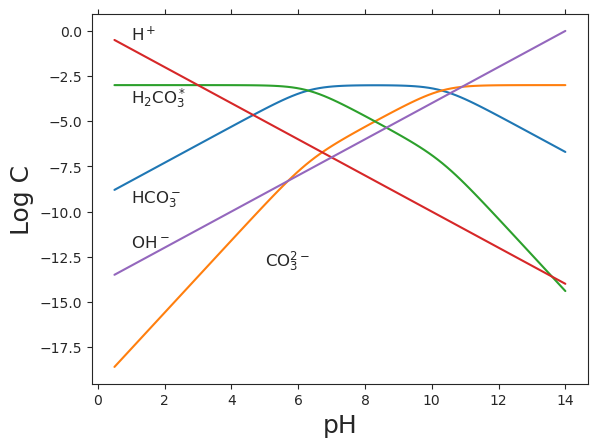

In [19]:
from matplotlib import pyplot as plt  # now we can use Matplotlib's plotting tools
# Make the figures interactive:
%matplotlib notebook
%matplotlib inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.bottom": True, "xtick.top": True})

# Draw a very basic plot
fig, ax = plt.subplots()
ax.plot(pH_increasing, HCO3)
ax.plot(pH_increasing, CO3)
ax.plot(pH_increasing, H2CO3)
ax.plot(pH_increasing, proton)
ax.plot(pH_increasing, OH)

plt.xlabel('pH', fontsize=18)
plt.ylabel('Log C',fontsize=18)
plt.annotate(r'H$^+$',(1,-0.5),fontsize=12)
plt.annotate(r'H$_2$CO$_3^*$',(1,-4),fontsize=12)
plt.annotate(r'HCO$_3^-$',(1,-9.5),fontsize=12)
plt.annotate(r'OH$^-$',(1,-12),fontsize=12)
plt.annotate(r'CO$_3^{2-}$',(5,-13),fontsize=12);


## Make a Log C vs pH Diagram for another weak acid (e.g. Phosphoric Acid)

The Python package [Matplotlib](https://matplotlib.org/) can help us visualise this result:

In [37]:

# Define the known system parameters as follows. 

pyco2_kws["par1"] = 100  # Total Alkalinity either measured or specificed by the recipe μmol/kg-sw
pyco2_kws["par2"] = pH_increasing  # array of increasing pH
pyco2_kws["par1_type"] = 2  # tell PyCO2SYS: "par1 is a DIC value"
pyco2_kws["par2_type"] = 3 # tell PyCO2SYS: "par2 is a pH value"

# Define the seawater conditions and add them to the dict
pyco2_kws["salinity"] = 0  # practical salinity
pyco2_kws["temperature"] = 25  # lab temperature (input conditions) in °C
pyco2_kws["temperature_out"] = 25  # in-situ temperature (output conditions) in °C
pyco2_kws["pressure"] = 0  # lab pressure (input conditions) in dbar, ignoring the atmosphere
pyco2_kws["pressure_out"] = 0  # in-situ pressure (output conditions) in dbar, ignoring the atmosphere
pyco2_kws["total_silicate"]  = 0  # total silicate in μmol/kg-sw
pyco2_kws["total_phosphate"] = 1000  # total phosphate in μmol/kg-sw
pyco2_kws["total_ammonia"] = 0  # total ammonia in μmol/kg-sw
pyco2_kws["total_sulfide"] = 0 # total sulfide in μmol/kg-sw
CO2dict_response = pyco2.sys(**pyco2_kws, k_water=1e-14, k_carbonic_1=10**(-6.3), k_carbonic_2=10**(-10.3))

In [16]:
# See how Phosphoric Acid concentrations change as a function of pH, concentrations in mol per kg
H3PO4 = np.log10 ((CO2dict_response["H3PO4"]/1e6))
H2PO4 = np.log10(CO2dict_response["H2PO4"]/1e6)
HPO4 = (np.log10(CO2dict_response["HPO4"]/1e6))
PO4 = (np.log10(CO2dict_response["PO4"]/1e6))
proton = np.log10(CO2dict_response["hydrogen_free"]/1e6)
OH = np.log10(CO2dict_response["OH"]/1e6)
print("Phosphoric acid response to increasing pH:")
print(CO2dict_response["H3PO4"])

Phosphoric acid response to increasing pH:
[9.78053590e+02 9.70199366e+02 9.59650221e+02 9.45576252e+02
 9.26966884e+02 9.02649436e+02 8.71358778e+02 8.31883769e+02
 7.83307765e+02 7.25330293e+02 6.58601380e+02 5.84937798e+02
 5.07270966e+02 4.29251381e+02 3.54595537e+02 2.86407952e+02
 2.26725986e+02 1.76405735e+02 1.35299127e+02 1.02577754e+02
 7.70640477e+01 5.74891529e+01 4.26560425e+01 3.15215043e+01
 2.32223032e+01 1.70690379e+01 1.25246808e+01 9.17825504e+00
 6.71922927e+00 4.91511697e+00 3.59301860e+00 2.62497073e+00
 1.91660074e+00 1.39848781e+00 1.01966155e+00 7.42749811e-01
 5.40378642e-01 3.92512742e-01 2.84496701e-01 2.05615599e-01
 1.48038962e-01 1.06046783e-01 7.54625897e-02 5.32380969e-02
 3.71485760e-02 2.55689394e-02 1.73087550e-02 1.14907499e-02
 7.46221612e-03 4.73207741e-03 2.92805479e-03 1.76863655e-03
 1.04446480e-03 6.04460725e-04 3.43785536e-04 1.92720937e-04
 1.06782854e-04 5.86241429e-05 3.19562588e-05 1.73249371e-05
 9.35407771e-06 5.03488322e-06 2.70380252e

''

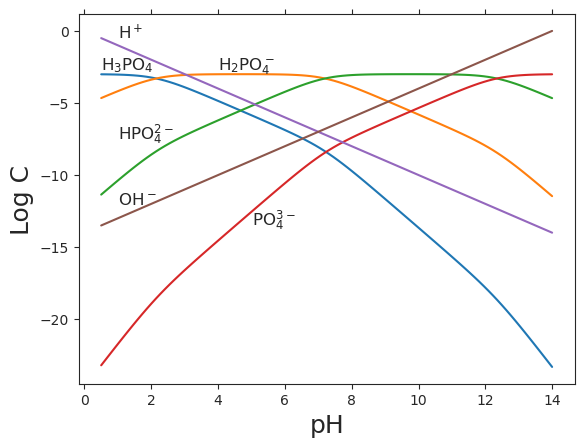

In [35]:
# Draw a very basic plot
fig, ax = plt.subplots()
ax.plot(pH_increasing, H3PO4)
ax.plot(pH_increasing, H2PO4)
ax.plot(pH_increasing, HPO4)
ax.plot(pH_increasing, PO4)
ax.plot(pH_increasing, proton)
ax.plot(pH_increasing, OH)

plt.xlabel('pH', fontsize=18)
plt.ylabel('Log C',fontsize=18)
plt.annotate(r'H$_2$PO$_4^-$',(4,-2.7),fontsize=12)
plt.annotate(r'H$^+$',(1,-0.5),fontsize=12)
plt.annotate(r'H$_3$PO$_4$',(0.5,-2.7),fontsize=12)
plt.annotate(r'HPO$_4^{2-}$',(1,-7.5),fontsize=12)
plt.annotate(r'OH$^-$',(1,-12),fontsize=12)
plt.annotate(r'PO$_4^{3-}$',(5,-13.5),fontsize=12);
;